In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver as wd
import time

In [3]:
import re,requests

In [41]:
def get_posts_insta(tag):
    r=requests.get('https://www.instagram.com/explore/tags/'+tag+'/')
    soup=BeautifulSoup(r.text,'html.parser')
    h=soup.find('meta', {'name':"description"})['content']
    
    
    x=re.findall(r'\S+',h)
    
    a=''
    for i in x[0]:
        if i==',':
            continue
        a+=i
    if 'k' in a:
        b=a[:-1]
        return float(b)*1000
    elif 'm' in a:
        b=a[:-1]
        return float(b)*1000000
    else:
        return int(a)
    

In [45]:
x1=get_posts_insta('WorldKindnessDay')

In [46]:
x1

95000.0

In [6]:
x2=get_posts_insta('iccworldcup2019')

In [7]:
def get_tweets(tag):
    driver=wd.Chrome(r"C:\Users\Tarun\PycharmProjects\untitled\library\chromedriver.exe")
    driver.get(r"https://twitter.com/hashtag/"+ tag +"?src=rela")
    SCROLL_PAUSE_TIME = 3
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    tags=driver.find_elements_by_tag_name('li')
    driver.close()
    return(len(tags))

In [54]:
get_tweets('jcbkikhudai')

199

In [17]:
y2=get_tweets('iccworldcup2019')

In [13]:
y1=785

In [18]:
y2

806

In [19]:
import seaborn as sns

In [20]:
x3=[['insta','jcb',(x1/(x1+x2))*100],['insta','worldcup',(x2/(x1+x2))*100]]

In [21]:
y3=[['twitter','jcb',(y1/(y1+y2))*100],['twitter','worldcup',(y2/(y1+y2))*100]]

In [22]:
import pandas as pd

In [23]:
data1=[x3,y3]

In [24]:

data1

[[['insta', 'jcb', 91.94234404536861],
  ['insta', 'worldcup', 8.05765595463138]],
 [['twitter', 'jcb', 49.34003771213074],
  ['twitter', 'worldcup', 50.65996228786926]]]

In [26]:
df=pd.DataFrame(x3,columns=['site','tag','posts'])
df1=pd.DataFrame(y3,columns=['site','tag','posts'])
df=df.append(df1)

In [27]:
df

,site,tag,posts
0,insta,jcb,91.942344
1,insta,worldcup,8.057656
0,twitter,jcb,49.340038
1,twitter,worldcup,50.659962


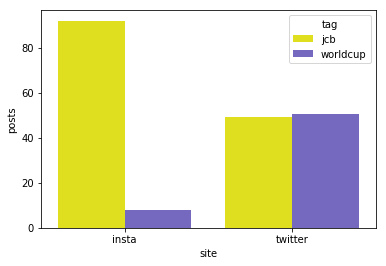

In [38]:
sns.barplot(x='site',y='posts',hue='tag',data=df,palette=['yellow','slateblue'])